# Challenge Set 4 (Linear Learning)¶

Topic: 

Date: 01/22/2016

Name: Kenneth Myers

Worked with: NA

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Challenge 1

In [83]:
B0 = random.random()*10
B1 = random.random()*10

f = np.random.randn(1000)*1000
x = np.random.choice(np.arange(1,100000), 1000) + f
e = np.random.randn(1000)
y = B0 + B1*np.log(x) + e

In [84]:
#print(log_data)

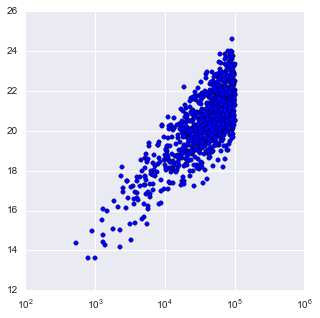

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(x,y, marker='o')

plt.xscale('log')

### Quadratic fit

In [5]:
log_data = pd.DataFrame({'y':y, 'x':x, 'x2': np.power(x,2)})
log_data = log_data.dropna()
#log_data['const'] = [1 for i in range(len(x))] <---- no need for this line when working with smf.ols

In [22]:
def getQuadModel(data):
    model = smf.ols(formula='y ~ np.square(x) + x', data=data)
    results = model.fit()
    return results

In [23]:
def getPlot(results, title, ylabel='Y', xlabel='X', var=1):
    sm.graphics.plot_fit(results, var)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

In [24]:
quad_fit = getQuadModel(log_data)

In [25]:
quad_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     707.7
Date:                Sat, 23 Jan 2016   Prob (F-statistic):          1.05e-191
Time:                        19:51:54   Log-Likelihood:                -1495.6
No. Observations:                 995   AIC:                             2997.
Df Residuals:                     992   BIC:                             3012.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       17.1962      0.106    161.860      0.000        16.988    17.405
np.square(x) -6.155e-10   4.71e-11    -13.059      0.000     -7.08e-10 -5.23e-10
x                0.0001   4.88e-06     21.443      0.000       9.5e-05     0.000
==============================================================================
Omnibus:                        1.946   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.816
Skew:                          -0.096   Prob(JB):                        0.403
Kurtosis:                       3.081   Cond. No.                     1.35e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

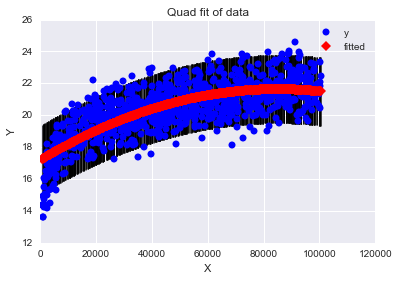

In [26]:
getPlot(quad_fit, title='Quad fit of data', var=2)

In [27]:
log_data = sm.tools.tools.add_constant(log_data)
log_data.head()

,const,x,x2,y
0,1,65415.458867,4.279182e+09,20.063485
1,1,46409.710735,2.153861e+09,21.900599
2,1,92888.011041,8.628183e+09,22.792618
3,1,85538.992937,7.316919e+09,21.997743
4,1,10113.883790,1.022906e+08,18.278780


### Log fit

In [28]:
def getLogModel(data):
    model = smf.ols(formula='y ~ np.log(x)', data=data)
    results = model.fit()
    return results

In [29]:
log_fit = getLogModel(log_data)

In [30]:
log_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     1767.
Date:                Sat, 23 Jan 2016   Prob (F-statistic):          1.29e-222
Time:                        19:52:16   Log-Likelihood:                -1428.2
No. Observations:                 995   AIC:                             2860.
Df Residuals:                     993   BIC:                             2870.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.7054      0.374     12.574      0.000         3.971     5.440
np.log(x)      1.4877      0.035     42.030      0.000         1.418     1.557
==============================================================================
Omnibus:                        1.467   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.480   Jarque-Bera (JB):                1.471
Skew:                           0.042   Prob(JB):                        0.479
Kurtosis:                       2.832   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

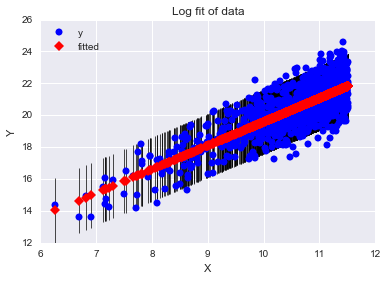

In [31]:
getPlot(log_fit, title='Log fit of data', var=1)

This seems accurate, the fit seems to match the data.

## Challenge 2

In [180]:
np.random.seed(101)

B0 = random.random()*10
B1 = random.random()*10
B2 = random.random()*10

f = np.random.randn(1000)
x = np.random.choice(np.arange(1,10), 1000)*f
e = random.random()*3*np.random.choice(range(200), 1000)
y = B0 + B1*x + B2*np.square(x) + e

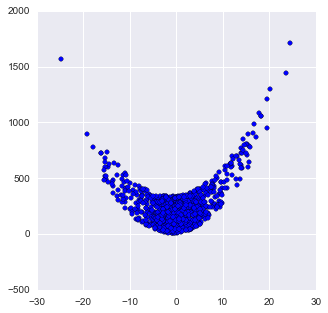

In [181]:
plt.figure(figsize=(5,5))
plt.scatter(x,y, marker='o')


In [182]:
quad_data = pd.DataFrame({'x':x,'y':y,'x2':np.square(x)})

In [183]:
quad_data = sm.add_constant(quad_data)

In [184]:
train, test = train_test_split(quad_data, test_size = 0.25)

In [185]:
quad_fit_2 = getQuadModel(train)

In [186]:
quad_fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     1007.
Date:                Sat, 23 Jan 2016   Prob (F-statistic):          8.61e-213
Time:                        20:30:20   Log-Likelihood:                -4501.3
No. Observations:                 750   AIC:                             9009.
Df Residuals:                     747   BIC:                             9022.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      172.3072      4.018     42.884      0.000       164.419   180.195
np.square(x)     2.2470      0.055     40.888      0.000         2.139     2.355
x                5.3529      0.633      8.453      0.000         4.110     6.596
==============================================================================
Omnibus:                      623.612   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.738
Skew:                          -0.023   Prob(JB):                     7.10e-11
Kurtosis:                       1.778   Cond. No.                         84.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

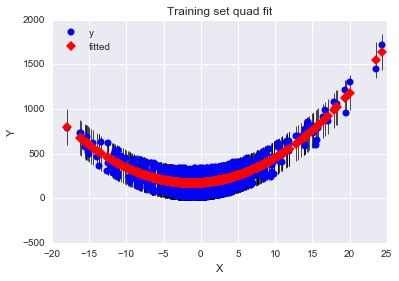

In [187]:
getPlot(quad_fit_2, title='Training set quad fit', var = 2)

In [188]:
test.head()

,const,x,x2,y
865,1,-0.230439,0.053102,154.603108
460,1,1.323162,1.750757,278.970815
727,1,-1.280880,1.640652,126.697714
293,1,4.115243,16.935222,178.465500
118,1,4.699896,22.089025,133.610300


In [211]:
def quadPlotTest(results, train, test, dpdnt='y', indp1='x', indp2='x2', const='const'):
    test = test.sort_values(by=indp1, ascending=True)
    plt.scatter(train[indp1], train[dpdnt], label='Training', color = 'red')
    plt.plot(test[indp1], results.predict(test[[const, indp2, indp1]]), color='black',linewidth=1, label='Test')
    plt.xlabel(indp1)
    plt.ylabel(dpdnt)
    plt.legend(loc='upper left')
    plt.title('Training and Testing Data')

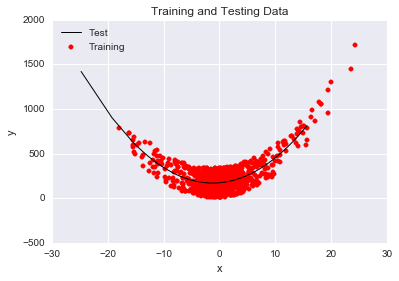

In [212]:
quadPlotTest(quad_fit_2, train, test)

### MSE Calculations

##### Training 

In [216]:
mean_squared_error(train.y, quad_fit_2.predict(train[['const', 'x', 'x2']]))

9562.7731407601004

##### Testing 

In [217]:
mean_squared_error(test.y, quad_fit_2.predict(test[['const', 'x', 'x2']]))

9647.071006228125

## Challenge 3 